<a href="https://colab.research.google.com/github/chaymoun/reconnaissance-des-chiffres-/blob/master/Reconnaissance_des_chiffres_avec_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importer des modues et des bibilotheques
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
#chargement de données 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
# (60000, 28, 28)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [0]:
print(X_train.shape)
print(X_test)

(60000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


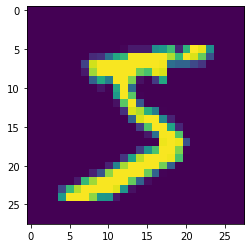

In [0]:
#la sortie d'image
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

##prétraiter les données d'entrer 

In [0]:
#redimensionnement
X_train = X_train.reshape(-1, 28, 28, 1) #block redim,profondeur,largeur,hauteur
X_test = X_test.reshape(-1, 28, 28, 1)
print (X_test.shape)
print(X_test)

# (60000, 1, 28, 28)

(10000, 28, 28, 1)
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
 

In [0]:
#conversion et normalisation 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print (y_train.shape)
# (60000,)
print (y_train[:32])
# [5 0 4 1 9 2 1 3 1 4]

(60000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8]


In [0]:
# prétraiter les données de classes 
#Y_train = np_utils.to_categorical(y_train, 10)
#Y_test = np_utils.to_categorical(y_test, 10)
Y_train=y_train
Y_test=y_test
print (X_train.shape)
print (Y_train.shape)
# (60000, 10)

(60000, 28, 28, 1)
(60000,)


##Definir le modéle 

In [0]:
model = Sequential()
model.add(Convolution2D(28, 1, 1, activation='relu', input_shape=(28,28,1)))#filtre,kernal size/haut,larg,col
print (model.input_shape)
print (model.output_shape)
# (None, 32, 26, 26)


(None, 28, 28, 1)
(None, 28, 28, 28)


In [0]:
model.add(Convolution2D(28, (3, 3), activation='relu'))#focus sur les details
model.add(MaxPooling2D(pool_size=(2,2))) #eviter over fit
model.add(Convolution2D(28, (3, 3), activation='relu'))
print (model.output_shape)
model.add(Dropout(0.25))

(None, 11, 11, 28)


la sommaire de modele sequentiel

> 



In [0]:
print (model.input_shape)
print (model.output_shape)
model.add(Flatten()) #aplatir les données et les convetir en un seul vect
model.add(Dense(128, activation='relu')) #tkhraj l out oput
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
print (model.input_shape)
print (model.output_shape)
model.summary()


(None, 28, 28, 1)
(None, 11, 11, 28)
(None, 28, 28, 1)
(None, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        56        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 28)        7084      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3388)              0         
________________________________________________________

compiler le modele

In [0]:
import tensorflow as tf 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])#definir la fonction de perte 

In [0]:
print (model.input_shape)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)
model.fit(X_train, Y_train, batch_size=32,epochs=10,verbose=1)

(None, 28, 28, 1)
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4989 - accuracy: 0.8957
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4431 - accuracy: 0.9492
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4353 - accuracy: 0.9567
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4319 - accuracy: 0.9597
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4296 - accuracy: 0.9624
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4280 - accuracy: 0.9639
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4257 - accuracy: 0.9662
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4292 - accuracy: 0.9625
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4285 - accuracy: 0.9633
Epoch 10

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.4103174209594727, 0.9815000295639038]
